In [1]:
import pandas as pd

# Step 1: Data Preparation

In [2]:
file1 = pd.read_csv('ratings.csv')
file2 = pd.read_csv('movies.csv')
file3 = pd.read_csv('links.csv')

In [3]:
# Merging ratings and tags on movieId first, using inner join
merged = pd.merge(file1, file2, on="movieId", how="inner")
merged

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [4]:
# Merging the resulting dataframe with movies dataframe still on movieId using inner join
merged = pd.merge(merged, file3, on="movieId", how="inner")
merged

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,4972582,381288.0
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,5052448,419430.0
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0


In [5]:
# To check if there is any empty value at all
merged.isnull().values.any()

True

In [6]:
# to check how many missing values are in each column
merged.isnull().sum()

userId        0
movieId       0
rating        0
timestamp     0
title         0
genres        0
imdbId        0
tmdbId       13
dtype: int64

In [7]:
# to drop rows with missing values
merged = merged.dropna()
merged.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
imdbId       0
tmdbId       0
dtype: int64

In [8]:
# to check if there are any missing values are in each column again
merged.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
imdbId       0
tmdbId       0
dtype: int64

In [9]:
# to find duplicate rows
merged.duplicated().sum()

0

In [10]:
# Converting the timestamp columns to datetime format for better readability
merged['timestamp'] = pd.to_datetime(merged['timestamp'], unit='s')
merged

C:\Users\HP\AppData\Local\Temp\ipykernel_14340\2614373280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['timestamp'] = pd.to_datetime(merged['timestamp'], unit='s')


,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,113277,949.0
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,4972582,381288.0
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,5052448,419430.0
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,3315342,263115.0


# Step 2: Feature Engineering

In [11]:
# main genre feature - extracting the first genre from the genres column
merged["main_genre"] = merged["genres"].str.split("|").str[0]
merged

C:\Users\HP\AppData\Local\Temp\ipykernel_14340\3737014571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["main_genre"] = merged["genres"].str.split("|").str[0]


,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,main_genre
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,Adventure
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,Comedy
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,113277,949.0,Action
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,Mystery
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,Crime
...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,4972582,381288.0,Drama
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0,Action
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,5052448,419430.0,Horror
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,3315342,263115.0,Action


In [12]:
# genres count feature - number of genres associated with each movie
merged["genres_count"] = merged["genres"].str.count("\|") + 1
merged

<>:2: SyntaxWarning: invalid escape sequence '\|'
<>:2: SyntaxWarning: invalid escape sequence '\|'
C:\Users\HP\AppData\Local\Temp\ipykernel_14340\2062751802.py:2: SyntaxWarning: invalid escape sequence '\|'
  merged["genres_count"] = merged["genres"].str.count("\|") + 1
C:\Users\HP\AppData\Local\Temp\ipykernel_14340\2062751802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["genres_count"] = merged["genres"].str.count("\|") + 1


,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,main_genre,genres_count
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,Adventure,5
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,Comedy,2
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,113277,949.0,Action,3
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,Mystery,2
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,Crime,3
...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,4972582,381288.0,Drama,3
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0,Action,3
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,5052448,419430.0,Horror,1
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,3315342,263115.0,Action,2


In [13]:
# release year - extracting the release year from the title column
merged["release_year"] = merged["title"].str.extract(r'\((\d{4})\)').astype("Int64")
merged

C:\Users\HP\AppData\Local\Temp\ipykernel_14340\2983608304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["release_year"] = merged["title"].str.extract(r'\((\d{4})\)').astype("Int64")


,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,main_genre,genres_count,release_year
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,Adventure,5,1995
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,Comedy,2,1995
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,113277,949.0,Action,3,1995
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,Mystery,2,1995
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,Crime,3,1995
...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,4972582,381288.0,Drama,3,2017
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0,Action,3,2017
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,5052448,419430.0,Horror,1,2017
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,3315342,263115.0,Action,2,2017


In [14]:
# rating datetime features - extracting year, month, and day from the timestamp column
merged["rating_datetime"] = pd.to_datetime(merged["timestamp"])

# rating year feature - extracting year from the timestamp column
merged["rating_year"] = merged["timestamp"].dt.year

merged

C:\Users\HP\AppData\Local\Temp\ipykernel_14340\2764097569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["rating_datetime"] = pd.to_datetime(merged["timestamp"])
C:\Users\HP\AppData\Local\Temp\ipykernel_14340\2764097569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["rating_year"] = merged["timestamp"].dt.year


,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,main_genre,genres_count,release_year,rating_datetime,rating_year
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,Adventure,5,1995,2000-07-30 18:45:03,2000
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,Comedy,2,1995,2000-07-30 18:20:47,2000
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,113277,949.0,Action,3,1995,2000-07-30 18:37:04,2000
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,Mystery,2,1995,2000-07-30 19:03:35,2000
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,Crime,3,1995,2000-07-30 18:48:51,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,4972582,381288.0,Drama,3,2017,2017-05-03 21:53:22,2017
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0,Action,3,2017,2017-05-03 22:21:31,2017
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,5052448,419430.0,Horror,1,2017,2017-05-08 19:50:47,2017
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,3315342,263115.0,Action,2,2017,2017-05-03 21:19:12,2017


In [15]:
# average movie rating feature - average rating for each movie
merged["avg_movie_rating"] = merged.groupby("movieId")["rating"].transform("mean")
merged

C:\Users\HP\AppData\Local\Temp\ipykernel_14340\3810180607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["avg_movie_rating"] = merged.groupby("movieId")["rating"].transform("mean")


,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,main_genre,genres_count,release_year,rating_datetime,rating_year,avg_movie_rating
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,Adventure,5,1995,2000-07-30 18:45:03,2000,3.920930
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,Comedy,2,1995,2000-07-30 18:20:47,2000,3.259615
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,113277,949.0,Action,3,1995,2000-07-30 18:37:04,2000,3.946078
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,Mystery,2,1995,2000-07-30 19:03:35,2000,3.975369
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,Crime,3,1995,2000-07-30 18:48:51,2000,4.237745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,4972582,381288.0,Drama,3,2017,2017-05-03 21:53:22,2017,3.333333
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0,Action,3,2017,2017-05-03 22:21:31,2017,4.142857
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,5052448,419430.0,Horror,1,2017,2017-05-08 19:50:47,2017,3.633333
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,3315342,263115.0,Action,2,2017,2017-05-03 21:19:12,2017,4.280000


In [17]:
# movie age feature - calculating the age of the movie based on the release year
from datetime import datetime
merged["movie_age"] = datetime.now().year - merged["release_year"]
merged

C:\Users\HP\AppData\Local\Temp\ipykernel_14340\3663090449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["movie_age"] = datetime.now().year - merged["release_year"]


,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,main_genre,genres_count,release_year,rating_datetime,rating_year,avg_movie_rating,movie_age
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,Adventure,5,1995,2000-07-30 18:45:03,2000,3.920930,30
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,Comedy,2,1995,2000-07-30 18:20:47,2000,3.259615,30
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,113277,949.0,Action,3,1995,2000-07-30 18:37:04,2000,3.946078,30
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,Mystery,2,1995,2000-07-30 19:03:35,2000,3.975369,30
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,Crime,3,1995,2000-07-30 18:48:51,2000,4.237745,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,4972582,381288.0,Drama,3,2017,2017-05-03 21:53:22,2017,3.333333,8
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0,Action,3,2017,2017-05-03 22:21:31,2017,4.142857,8
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,5052448,419430.0,Horror,1,2017,2017-05-08 19:50:47,2017,3.633333,8
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,3315342,263115.0,Action,2,2017,2017-05-03 21:19:12,2017,4.280000,8


# Step 3: Exploratory Data Analysis (EDA)

In [18]:
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Making the charts look nice
sns.set(style="whitegrid")

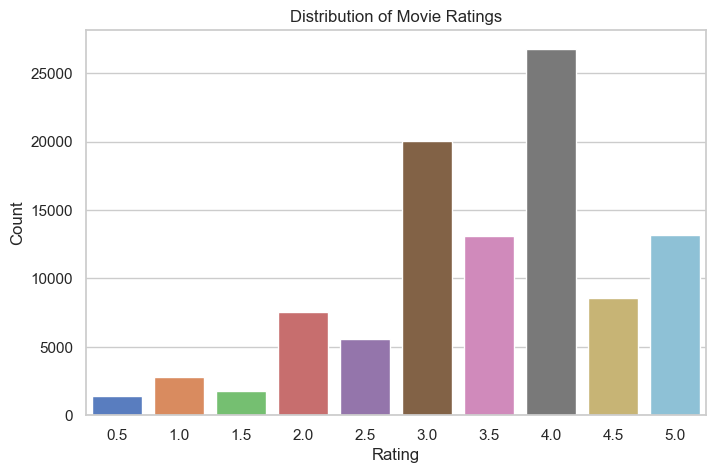

In [19]:
# Do people tend to rate movies high or low? What do ratings look like overall?

plt.figure(figsize=(8,5))
sns.barplot(x = merged["rating"].value_counts().index,hue=merged["rating"].value_counts().index, y=merged["rating"].value_counts().values, palette="muted", legend=False)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

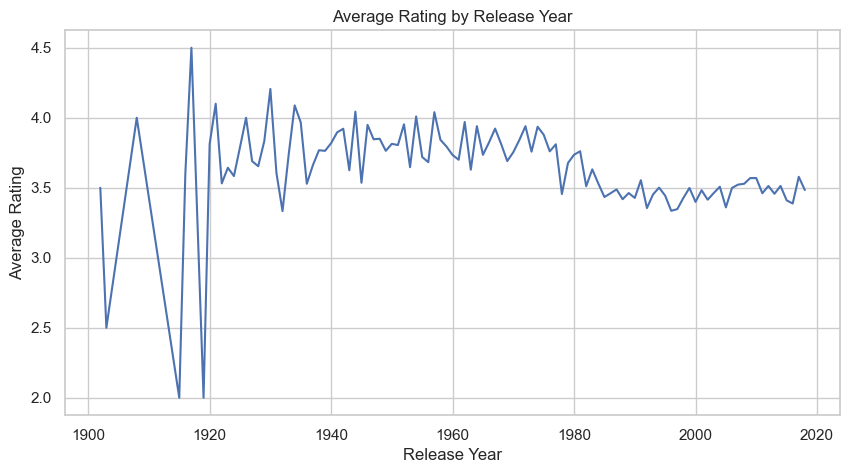

In [20]:
# Do newer movies get higher ratings? Is there a trend between movie age and average rating?

plt.figure(figsize=(10,5))
sns.lineplot(data=merged, x="release_year", y="rating", errorbar=None)
plt.title("Average Rating by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.show()

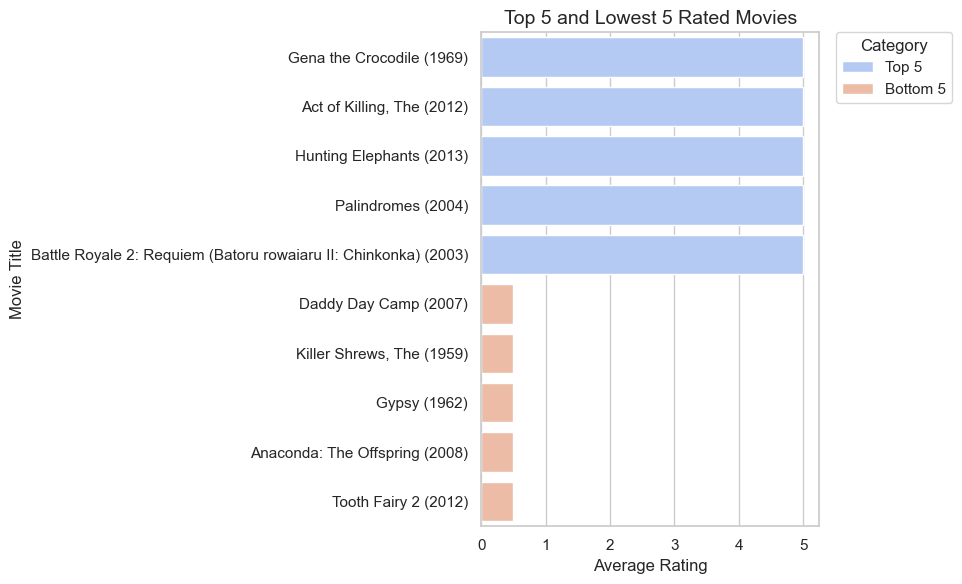

In [21]:
# What are the top-rated movies? Which movies have the highest average ratings and which have the lowest?

# Calculate average rating per movie
avg_ratings = merged.groupby("title")["rating"].mean()

# Get top 5 and bottom 5
top5 = avg_ratings.sort_values(ascending=False).head(5)
bottom5 = avg_ratings.sort_values(ascending=True).head(5)

# Combine them into one DataFrame for easy plotting
rating_extremes = pd.concat([top5, bottom5])
rating_extremes = rating_extremes.reset_index()
rating_extremes["Category"] = ["Top 5"]*5 + ["Bottom 5"]*5

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=rating_extremes, x="rating", y="title", hue="Category", palette="coolwarm")
plt.title("Top 5 and Lowest 5 Rated Movies", fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()


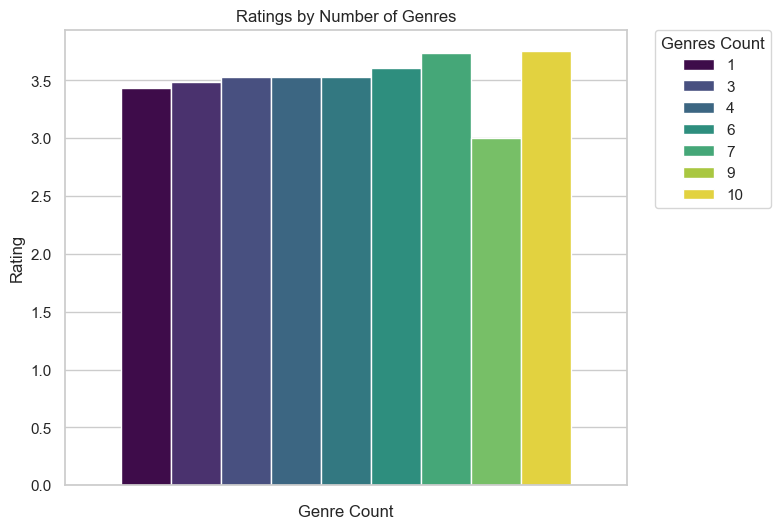

In [22]:
# Do movies with more genres tend to have higher or lower ratings? Are multi-genre movies rated differently than single-genre movies?

plt.figure(figsize=(8,5))
sns.barplot(data=merged, y="rating", errorbar=None, palette="viridis", hue="genres_count")
# Move legend to the right of the chart
plt.legend( title="Genres Count",
    bbox_to_anchor=(1.05, 1),  # (x, y) position; increase x to move further right
    loc="upper left", borderaxespad=0
)
plt.tight_layout()
plt.title("Ratings by Number of Genres")
plt.xlabel("Genre Count")
plt.ylabel("Rating")
plt.show()

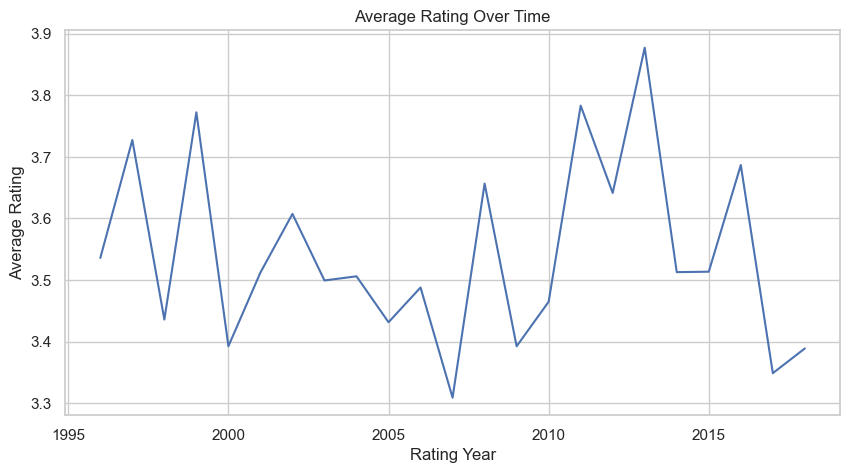

In [23]:
# Does ratings change over time? Are there trends in average ratings by year?

plt.figure(figsize=(10,5))
yearly_ratings = merged.groupby("rating_year")["rating"].mean()
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values)
plt.title("Average Rating Over Time")
plt.xlabel("Rating Year")
plt.ylabel("Average Rating")
plt.show()

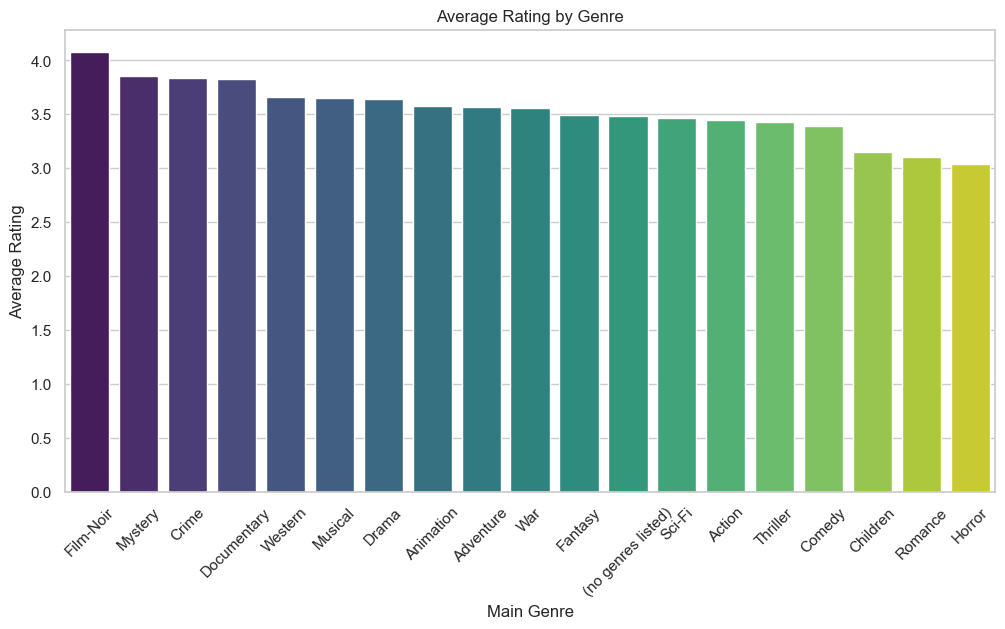

In [24]:
# Do certain genres tend to have higher or lower ratings? Which genres are rated the highest and lowest on average?

plt.figure(figsize=(12,6))
genre_ratings = merged.groupby("main_genre")["rating"].mean().sort_values(ascending=False)
sns.barplot(x=genre_ratings.index, y=genre_ratings.values, palette="viridis", hue=genre_ratings.index)
plt.title("Average Rating by Genre")
plt.xlabel("Main Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# Finally

In [25]:
# saving the merged dataframe to a new csv file
merged.to_csv("merged_movies_ratings.csv", index=False)
merged

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,main_genre,genres_count,release_year,rating_datetime,rating_year,avg_movie_rating,movie_age
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,Adventure,5,1995,2000-07-30 18:45:03,2000,3.920930,30
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,Comedy,2,1995,2000-07-30 18:20:47,2000,3.259615,30
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,113277,949.0,Action,3,1995,2000-07-30 18:37:04,2000,3.946078,30
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,Mystery,2,1995,2000-07-30 19:03:35,2000,3.975369,30
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,Crime,3,1995,2000-07-30 18:48:51,2000,4.237745,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,4972582,381288.0,Drama,3,2017,2017-05-03 21:53:22,2017,3.333333,8
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0,Action,3,2017,2017-05-03 22:21:31,2017,4.142857,8
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,5052448,419430.0,Horror,1,2017,2017-05-08 19:50:47,2017,3.633333,8
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,3315342,263115.0,Action,2,2017,2017-05-03 21:19:12,2017,4.280000,8
